In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('lego_all.csv',index_col='date',parse_dates=True)
print(df.shape, df.columns)

(460684, 6) Index(['lego_id', 'low_price', 'theme', 'name', 'year', 'list_price'], dtype='object')


In [3]:
grouped = df.groupby('lego_id')
lego_id = []
lego_group = []
cnt = 0
for key,group in grouped:
    lego_id.append(key)
    lego_group.append(group)
    print(group.head())
    cnt += 1
print(cnt)

            lego_id  low_price    theme             name  year  list_price
date                                                                      
2022-01-29      630       2.49  Classic  Brick Separator  2011        2.49
2022-01-30      630       3.99  Classic  Brick Separator  2011        2.49
2022-02-05      630       2.49  Classic  Brick Separator  2011        2.49
2022-02-06      630       2.49  Classic  Brick Separator  2011        2.49
2022-02-07      630       2.49  Classic  Brick Separator  2011        2.49
            lego_id  low_price           theme             name  year  \
date                                                                    
2022-02-05    10255     279.99  Creator Expert  Assembly Square  2017   
2022-02-06    10255     279.99  Creator Expert  Assembly Square  2017   
2022-02-07    10255     279.99  Creator Expert  Assembly Square  2017   
2022-02-08    10255     279.99  Creator Expert  Assembly Square  2017   
2022-02-09    10255     279.99  Creat

In [4]:
df1 = lego_group[1]

train_size = int(len(df1) * 0.8)
test_size = int(len(df1)) - train_size
df1_train = df1.iloc[:-test_size]
df1_test = df1.iloc[-test_size:]

In [5]:
df1_low = df1['low_price']
print(df1_low.shape,type(df1_low))

(460,) <class 'pandas.core.series.Series'>


In [ ]:
print(df1_train.shape,df1_test.shape)

In [6]:
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(np.array(df1_low).reshape(-1,1))


In [7]:
scaled_train = scaled_data[:-test_size]
scaled_test = scaled_train[-test_size:]

In [8]:
print(scaled_train.shape, scaled_test.shape)

(368, 1) (92, 1)


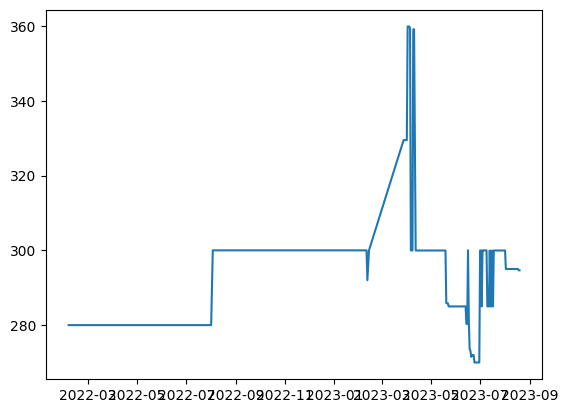

In [9]:
plt.plot(df1['low_price'])

In [10]:
n_inputs = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_inputs,batch_size=1)

for i in range(len(generator)):
    X, y = generator[i]
    print(f'\n {X.flatten()} and {y}')


 [0.11123471 0.11123471 0.11123471 0.11123471 0.11123471 0.11123471
 0.11123471 0.11123471 0.11123471 0.11123471 0.11123471 0.11123471] and [[0.11123471]]

 [0.11123471 0.11123471 0.11123471 0.11123471 0.11123471 0.11123471
 0.11123471 0.11123471 0.11123471 0.11123471 0.11123471 0.11123471] and [[0.11123471]]

 [0.11123471 0.11123471 0.11123471 0.11123471 0.11123471 0.11123471
 0.11123471 0.11123471 0.11123471 0.11123471 0.11123471 0.11123471] and [[0.11123471]]

 [0.11123471 0.11123471 0.11123471 0.11123471 0.11123471 0.11123471
 0.11123471 0.11123471 0.11123471 0.11123471 0.11123471 0.11123471] and [[0.11123471]]

 [0.11123471 0.11123471 0.11123471 0.11123471 0.11123471 0.11123471
 0.11123471 0.11123471 0.11123471 0.11123471 0.11123471 0.11123471] and [[0.11123471]]

 [0.11123471 0.11123471 0.11123471 0.11123471 0.11123471 0.11123471
 0.11123471 0.11123471 0.11123471 0.11123471 0.11123471 0.11123471] and [[0.11123471]]

 [0.11123471 0.11123471 0.11123471 0.11123471 0.11123471 0.1112

In [12]:
print(X.shape, y.shape)

(1, 12, 1) (1, 1)


In [15]:
# Create the stacked LSTM model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [16]:
model = Sequential()

In [17]:
model.add(LSTM(40, activation='relu', return_sequences=True, input_shape=(n_inputs,n_features)))
model.add(LSTM(40, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu', return_sequences=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 40)            6720      
                                                                 
 lstm_1 (LSTM)               (None, 12, 40)            12960     
                                                                 
 lstm_2 (LSTM)               (None, 12, 25)            6600      
                                                                 
 dense (Dense)               (None, 12, 1)             26        
                                                                 
Total params: 26306 (102.76 KB)
Trainable params: 26306 (102.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.fit(generator, epochs = 50)

Epoch 1/50
356/356 [==============================] - 7s 7ms/step - loss: 0.0271
Epoch 2/50
356/356 [==============================] - 3s 7ms/step - loss: 0.0156
Epoch 3/50
356/356 [==============================] - 3s 7ms/step - loss: 0.0130
Epoch 4/50
356/356 [==============================] - 3s 7ms/step - loss: 0.0116
Epoch 5/50
356/356 [==============================] - 2s 7ms/step - loss: 0.0111
Epoch 6/50
356/356 [==============================] - 2s 7ms/step - loss: 0.0105
Epoch 7/50
356/356 [==============================] - 2s 7ms/step - loss: 0.0102
Epoch 8/50
356/356 [==============================] - 2s 7ms/step - loss: 0.0100
Epoch 9/50
356/356 [==============================] - 2s 7ms/step - loss: 0.0098
Epoch 10/50
356/356 [==============================] - 2s 7ms/step - loss: 0.0093
Epoch 11/50
356/356 [==============================] - 3s 7ms/step - loss: 0.0093
Epoch 12/50
356/356 [==============================] - 2s 7ms/step - loss: 0.0089
Epoch 13/50
356/356 [====

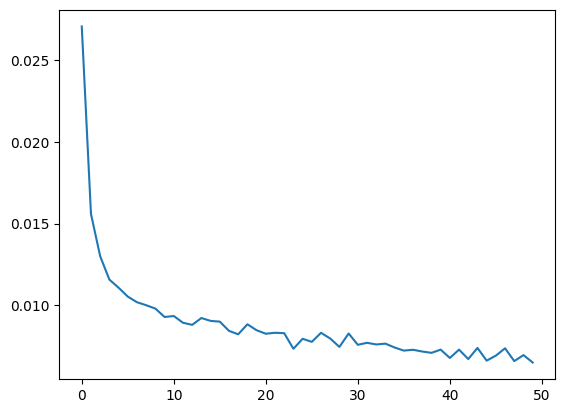

In [20]:
plt.plot(model.history.history['loss'])

In [21]:
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape(1, 12, 1)
last_train_batch


array([[[0.33325918],
        [0.33325918],
        [0.33325918],
        [0.33325918],
        [0.33325918],
        [0.33325918],
        [0.33325918],
        [0.33325918],
        [0.33325918],
        [0.33325918],
        [0.33325918],
        [0.33325918]]])

In [22]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 396ms/step


array([[[0.38201025],
        [0.36633265],
        [0.35585698],
        [0.3473736 ],
        [0.3409375 ],
        [0.33607572],
        [0.33291116],
        [0.33270833],
        [0.32954818],
        [0.3239892 ],
        [0.3181563 ],
        [0.31315738]]], dtype=float32)

In [23]:
scaled_test[0]

array([0.33370412])

In [ ]:
y_pred = []

first_batch = scaled_train[-n_inputs:]
current_batch = first_batch.reshape(1,n_inputs,n_features)

for i in range(len(scaled_test)):
    batch = current_batch
    pred = model.predict(batch)[0]
    y_pred.append(pred)
    current_batch = np.append(current_batch[:,1:,:], [[pred]], axis=1)

y_pred

scaled_test

In [ ]:
df1_test
y_pred_transformed = scaler.inverse_transform(y_pred)
y_pred_transformed = np.round(y_pred_transformed,0)
y_pred_final = y_pred_transformed.astype(int)
y_pred_final

In [ ]:
df1_test.values, y_pred_final
df1_test['Predictions'] = y_pred_final
df1_test

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(df1_train.index, df1_train.Passengers, linewidth=2, color='black', label='Train Values')
plt.plot(df1_test.index, df1_test.Passengers, linewidth=2, color='green', label='True Values')
plt.plot(df1_test.index, df1_test.Predictions, linewidth=2, color='red', label='Predicted Values')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(df1_test.Passengers, df1_test.Predictions))